### Import libs

In [92]:
import numpy as np
print("numpy version: {}".format(np.__version__))
import pandas as pd 
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import scipy as sp
print("scipy version: {}".format(sp.__version__))
import sklearn as sl
print("scikit-learn: {}".format(sl.__version__))
import seaborn as sns
print("seaborn: {}".format(sns.__version__))
import statsmodels as sm
print("statsmodels: {}".format(sm.__version__))

numpy version: 1.17.4
pandas version: 0.25.3
matplotlib version: 3.1.2
scipy version: 1.3.3
scikit-learn: 0.21.3
seaborn: 0.9.0
statsmodels: 0.10.2


In [93]:
import os

### Load data

In [94]:
data_path = '/home/vlad/.data/titanic/'

In [95]:
ls /home/vlad/.data/titanic/

gender_submission.csv  test.csv  titanic.zip  train.csv


In [96]:
train = pd.read_csv(data_path + 'train.csv')
test  = pd.read_csv(data_path + 'test.csv')
datasets = [train, test]

In [97]:
passenger_id = test.PassengerId

### Meet data

In [98]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [99]:
train.info()
print("train shape: {}".format(train.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
train shape: (891, 12)


In [100]:
test.info()
print("test shape: {}".format(test.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
test shape: (418, 11)


In [101]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [102]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [103]:
missing_percentage(train)[missing_percentage(train)['Total'] != 0]

,Total,Percent
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [104]:
missing_percentage(test)[missing_percentage(test)['Total'] != 0]

,Total,Percent
Cabin,327,78.23
Age,86,20.57
Fare,1,0.24


In [105]:
train.drop("Cabin", axis=1, inplace=True); test.drop("Cabin", axis=1, inplace=True)

In [106]:
train.sample(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,S
453,454,1,1,"Goldenberg, Mr. Samuel L",male,49.0,1,0,17453,89.1042,C
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,C
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,S
423,424,0,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,S


Categorical variables are Survived, Pclass, Sex, Embarked

In [107]:
for df in [train, test]:
    df["Pclass"] = df["Pclass"].astype('category')
    df["Sex"] = df["Sex"].astype('category')
    df["Embarked"] = df["Embarked"].astype('category')

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [109]:
train.Survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [110]:
def confusion_matrix(rowname, colname):
    conf_matrix = pd.crosstab(train[rowname], train[colname], rownames=[rowname], colnames=[colname], normalize=True, margins=True)
    return conf_matrix

In [111]:
cm_surv_pclass = confusion_matrix('Survived', 'Pclass')

In [112]:
cm_surv_pclass

Pclass,1,2,3,All
Survived,,,,
0,0.089787,0.108866,0.417508,0.616162
1,0.152637,0.097643,0.133558,0.383838
All,0.242424,0.206510,0.551066,1.000000


In [113]:
def conditional_precentages(df):
    for p in df.columns:
        print("{}:\nsurvived = {}\nnon survived = {}"
              .format(p, df[p][1] / df[p]['All'], 
                      df[p][0] / df[p]['All']))

In [114]:
conditional_precentages(cm_surv_pclass)

1:
survived = 0.6296296296296297
non survived = 0.37037037037037035
2:
survived = 0.47282608695652173
non survived = 0.5271739130434783
3:
survived = 0.24236252545824846
non survived = 0.7576374745417515
All:
survived = 0.3838383838383838
non survived = 0.6161616161616161


Here we can see that the highest precent of survived people is in Pclass=1

In [115]:
cm_surv_sex = confusion_matrix('Survived', 'Sex')

In [116]:
cm_surv_sex

Sex,female,male,All
Survived,,,
0,0.090909,0.525253,0.616162
1,0.261504,0.122334,0.383838
All,0.352413,0.647587,1.000000


In [117]:
conditional_precentages(cm_surv_sex)

female:
survived = 0.7420382165605095
non survived = 0.25796178343949044
male:
survived = 0.18890814558058924
non survived = 0.8110918544194108
All:
survived = 0.3838383838383838
non survived = 0.6161616161616161


In [118]:
train["Age"][train["Survived"] == 1].describe()

count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [119]:
train["Age"][train["Survived"] == 0].describe()

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64

In [120]:
train['Initial'] = 0
for _ in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

In [121]:
test['Initial'] = 0
for _ in test:
    test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [122]:
pd.crosstab(train.Initial, train.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [123]:
test['Initial'].replace(['Dona'], ['Other'], inplace=True)

In [124]:
pd.crosstab(test.Initial, test.Sex).T

Initial,Col,Dr,Master,Miss,Mr,Mrs,Ms,Other,Rev
Sex,,,,,,,,,
female,0,0,0,78,0,72,1,1,0
male,2,1,21,0,240,0,0,0,2


In [125]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                         inplace=True)

In [126]:
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                         ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                         inplace=True)

In [127]:
train.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [128]:
test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.114130
Mrs       38.903226
Other     42.000000
Name: Age, dtype: float64

In [129]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'), 'Age'] = 33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'), 'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Master'), 'Age'] = 5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'), 'Age'] = 22
train.loc[(train.Age.isnull())&(train.Initial=='Other'), 'Age'] = 46

In [130]:
test.loc[(test.Age.isnull())&(test.Initial=='Mr'), 'Age'] = 32
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'), 'Age'] = 39
test.loc[(test.Age.isnull())&(test.Initial=='Master'), 'Age'] = 7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'), 'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Other'), 'Age'] = 42

In [131]:
train.Age.isnull().any()

False

In [132]:
cm_surv_emb = confusion_matrix('Survived', 'Embarked')

In [133]:
cm_surv_emb

Embarked,C,Q,S,All
Survived,,,,
0,0.084364,0.052868,0.480315,0.617548
1,0.104612,0.033746,0.244094,0.382452
All,0.188976,0.086614,0.724409,1.000000


In [134]:
conditional_precentages(cm_surv_emb)

C:
survived = 0.5535714285714286
non survived = 0.4464285714285714
Q:
survived = 0.38961038961038963
non survived = 0.6103896103896104
S:
survived = 0.33695652173913043
non survived = 0.6630434782608695
All:
survived = 0.38245219347581555
non survived = 0.6175478065241845


In [135]:
train['Embarked'].fillna('S', inplace=True)

In [136]:
train.Embarked.isnull().any()

False

In [137]:
cm_surv_sibsp = confusion_matrix('Survived', 'SibSp')
cm_surv_sibsp

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,0.446689,0.108866,0.016835,0.013468,0.016835,0.005612,0.007856,0.616162
1,0.235690,0.125701,0.014590,0.004489,0.003367,0.000000,0.000000,0.383838
All,0.682379,0.234568,0.031425,0.017957,0.020202,0.005612,0.007856,1.000000


In [138]:
conditional_precentages(cm_surv_sibsp)

0:
survived = 0.34539473684210525
non survived = 0.6546052631578948
1:
survived = 0.5358851674641149
non survived = 0.4641148325358852
2:
survived = 0.46428571428571425
non survived = 0.5357142857142857
3:
survived = 0.25
non survived = 0.7499999999999999
4:
survived = 0.16666666666666666
non survived = 0.8333333333333333
5:
survived = 0.0
non survived = 1.0
8:
survived = 0.0
non survived = 1.0
All:
survived = 0.3838383838383838
non survived = 0.6161616161616161


In [139]:
pd.crosstab(train.Parch,train.Pclass, margins=True, normalize=True).T

Parch,0,1,2,3,4,5,6,All
Pclass,,,,,,,,
1,0.182941,0.034792,0.023569,0.000000,0.001122,0.000000,0.000000,0.242424
2,0.150393,0.035915,0.017957,0.002245,0.000000,0.000000,0.000000,0.206510
3,0.427609,0.061728,0.048260,0.003367,0.003367,0.005612,0.001122,0.551066
All,0.760943,0.132435,0.089787,0.005612,0.004489,0.005612,0.001122,1.000000


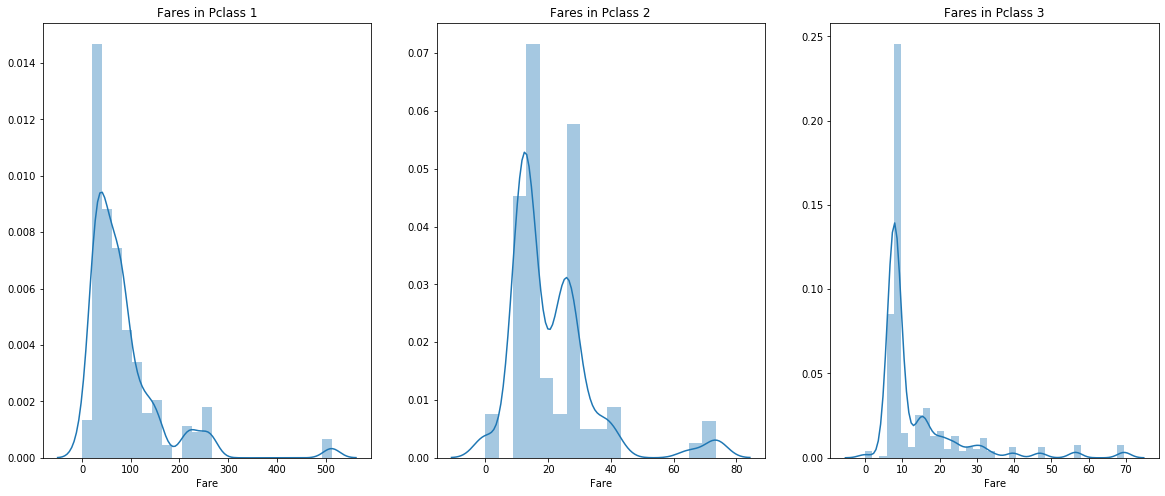

In [140]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass'] == 1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass'] ==2 ].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass'] == 3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

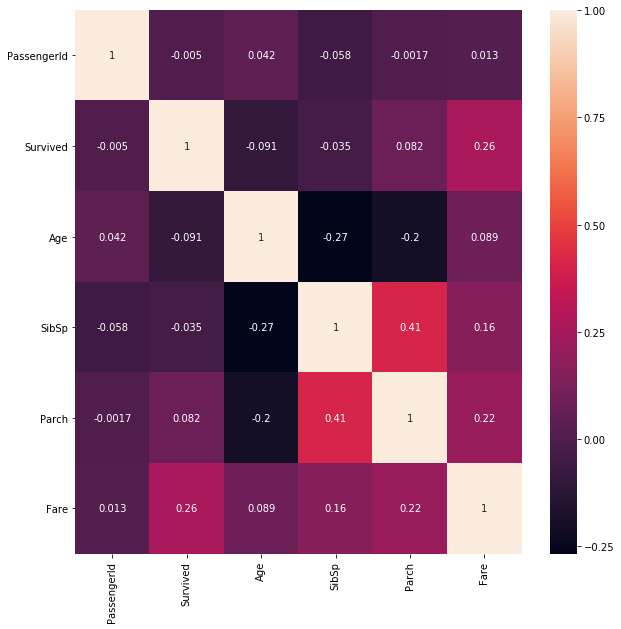

In [141]:
sns.heatmap(train.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

### Feature Engineering and Data Cleaning

In [142]:
train.Age.describe()

count    891.000000
mean      29.841942
std       13.281525
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [143]:
test.Age.describe()

count    418.000000
mean      30.197368
std       13.019880
min        0.170000
25%       22.000000
50%       30.000000
75%       36.875000
max       76.000000
Name: Age, dtype: float64

Convert quanlitative to categorical

In [144]:
train['Age_band'] = 0
train.loc[train['Age'] <= 16,'Age_band'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 32), 'Age_band'] = 2
train.loc[(train['Age'] > 32) & (train['Age'] <= 48), 'Age_band'] = 3
train.loc[(train['Age'] > 48) & (train['Age'] <= 64), 'Age_band'] = 4
train.loc[train['Age'] > 64, 'Age_band'] = 5
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,3


In [145]:
test['Age_band'] = 0
test.loc[test['Age'] <= 16,'Age_band'] = 1
test.loc[(test['Age'] > 16) & (test['Age'] <= 32), 'Age_band'] = 2
test.loc[(test['Age'] > 32) & (test['Age'] <= 48), 'Age_band'] = 3
test.loc[(test['Age'] > 48) & (test['Age'] <= 64), 'Age_band'] = 4
test.loc[test['Age'] > 64, 'Age_band'] = 5
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Age_band
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,3


In [146]:
train['Age_band'].value_counts().to_frame()

,Age_band
2,382
3,325
1,104
4,69
5,11


In [147]:
train['family_size'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train.family_size == 0, 'Alone'] = 1

In [148]:
test['family_size'] = test['Parch'] + test['SibSp']
test['Alone'] = 0
test.loc[test.family_size == 0, 'Alone'] = 1

In [149]:
confusion_matrix('Survived', 'Alone')

Alone,0,1,All
Survived,,,
0,0.196409,0.419753,0.616162
1,0.200898,0.182941,0.383838
All,0.397306,0.602694,1.000000


In [150]:
conditional_precentages(confusion_matrix('Survived', 'Alone'))

0:
survived = 0.5056497175141242
non survived = 0.49435028248587565
1:
survived = 0.3035381750465549
non survived = 0.696461824953445
All:
survived = 0.3838383838383838
non survived = 0.6161616161616161


In [151]:
train['fare_range'] = pd.qcut(train['Fare'], 4)
train.groupby(['fare_range'])['Survived'].mean().to_frame()

,Survived
fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [152]:
train.fare_range.head(4)

0     (-0.001, 7.91]
1    (31.0, 512.329]
2     (7.91, 14.454]
3    (31.0, 512.329]
Name: fare_range, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [153]:
train['Fare_cat'] = 0
train.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare_cat'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare_cat'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 513), 'Fare_cat'] = 3
test['Fare_cat'] = 0
test.loc[train['Fare'] <= 7.91, 'Fare_cat'] = 0
test.loc[(train['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare_cat'] = 1
test.loc[(train['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare_cat'] = 2
test.loc[(train['Fare'] > 31) & (test['Fare'] <= 513), 'Fare_cat'] = 3

In [154]:
train['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0 ,1, 2, 3, 4], inplace=True)

In [155]:
test['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2], inplace=True)
test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0 ,1, 2, 3, 4], inplace=True)

In [156]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Embarked', 'Initial', 'Age_band',
        'family_size', 'Alone', 'fare_range', 'Fare_cat'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Embarked', 'Initial', 'Age_band', 'family_size',
        'Alone', 'Fare_cat'],
       dtype='object'))

In [157]:
train.drop(['Name','Age','Ticket','Fare','fare_range','PassengerId'],axis=1,inplace=True)
test.drop(['Name','Age','Ticket','Fare','PassengerId'],axis=1,inplace=True)

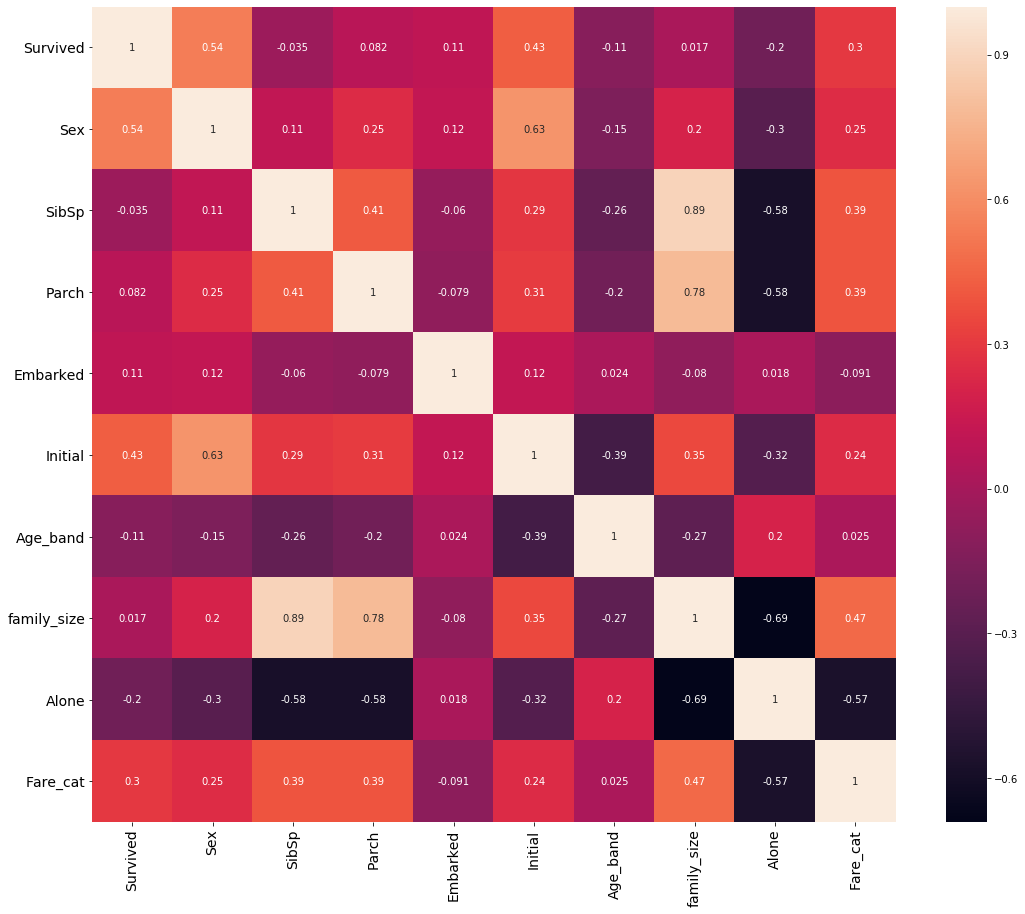

In [158]:
sns.heatmap(train.corr(), annot=True)
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Predicting model

In [159]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,family_size,Alone,Fare_cat
0,0,3,0,1,0,0,0,2,1,0,0
1,1,1,1,1,0,1,1,3,1,0,3
2,1,3,1,0,0,0,2,2,0,1,1
3,1,1,1,1,0,0,1,3,1,0,3
4,0,3,0,0,0,0,0,3,0,1,1


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [161]:
df_train, df_test = train_test_split(train, test_size=0.3, random_state=0, stratify=train['Survived'])
train_X = df_train[df_train.columns[1:]]
train_Y = df_train[df_train.columns[:1]]
test_X = df_test[df_test.columns[1:]]
test_Y = df_test[df_test.columns[:1]]
X = train[train.columns[1:]]
Y = train['Survived']

In [168]:
lr_model = LogisticRegression()
lr_model.fit(train_X, train_Y)
lr_prediction = lr_model.predict(test_X)
print("accuracy - {}".format(metrics.accuracy_score(lr_prediction, test_Y)))

accuracy - 0.8171641791044776


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [169]:
knn_model = KNeighborsClassifier() 
knn_model.fit(train_X,train_Y)
knn_prediction = knn_model.predict(test_X)
print('accuracy - {}'.format(metrics.accuracy_score(knn_prediction,test_Y)))

accuracy - 0.832089552238806


/home/vlad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [182]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [184]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [183]:
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(train_X, train_Y)
LDA_prediction = LDA_model.predict(test_X)
print('accuracy - {}'.format(metrics.accuracy_score(LDA_prediction, test_Y)))

accuracy - 0.8134328358208955


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [185]:
QDA_model = QuadraticDiscriminantAnalysis()
QDA_model.fit(train_X, train_Y)
QDA_prediction = QDA_model.predict(test_X)
print('accuracy - {}'.format(metrics.accuracy_score(QDA_prediction, test_Y)))

accuracy - 0.7835820895522388


/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vlad/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [190]:
test_prediction = QDA_model.predict(test)
submission = pd.DataFrame({
    "PassengerId": passenger_id,
    "Survived": test_prediction
})
submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic_submission_QDA.csv", index=False)

In [188]:
!ls

checkpoint		   titanic6_submission.csv
evaluation_submission.csv  titanic7_submission.csv
submission.csv		   titanic.ckpt.data-00000-of-00001
titanic_08.02.20.ipynb	   titanic.ckpt.index
titanic1_submission.csv    titanic.ckpt.meta
Titanic2.py		   Titanic.ipynb
titanic2_submission.csv    Titanic_old.ipynb
titanic3_submission.csv    titanic_submission8.csv
titanic4_submission.csv    titanic_submission_LDA.csv
titanic5_submission.csv


In [191]:
!kaggle competitions submit -c titanic -f titanic_submission_QDA.csv -m "QDA"

100%|██████████| 2.77k/2.77k [00:04<00:00, 569B/s]  
Successfully submitted to Titanic: Machine Learning from Disaster